In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
import statsmodels.api as sma

%matplotlib inline

/home/tronco/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


MAPE: Mean Absolute Percentaje Error


In [3]:
def mape_score(y_test,y_pred):
    n = len(y_test)
    error = np.abs((y_test - y_pred)/np.mean(y_test))
    return np.sum(error)/n
    
def show_errors(y_test,y_pred):
    if type(y_test) is pd.DataFrame:
        y_test = y_test.values
    if type(y_pred) is pd.DataFrame:
        y_pred = y_pred.values
        
    n_metrics = 5
    metrics = np.zeros((n_metrics,13))
    for i in range(12):
        mae = sm.mean_absolute_error(y_test[:,i],y_pred[:,i])
        mse = sm.mean_squared_error(y_test[:,i],y_pred[:,i])
        medae = sm.median_absolute_error(y_test[:,i],y_pred[:,i])
        r2 = sm.r2_score(y_test[:,i],y_pred[:,i])
        mape = mape_score(y_test[:,i],y_pred[:,i])
        metrics[0,i] = mae
        metrics[1,i] = mse
        metrics[2,i] = medae
        metrics[3,i] = mape
        metrics[4,i] = r2
    for i in range(n_metrics):
        metrics[i,12] = np.mean(metrics[i,:12])
    
    metrics = pd.DataFrame(metrics)
    column_names = []
    for i in range(12):
        column_names.append("$t+{}$".format(i))
    column_names.append("$\overline{t+i}$")
    metrics.index = ["MAE","MSE", "MeAE", "MAPE" ,"$r^2$"]
    metrics.columns = column_names
    return metrics

In [4]:
column_names = []
for i in range(1,13):
    if i < 10:
        column_names.append("$t+.{}$".format(i))
    else:
        column_names.append("$t+{}$".format(i))

# ARIMA

In [15]:
y_pred = pd.read_csv("../../results/arima/canela1_y_approx.csv",names=column_names, skiprows=1)
y_test  = pd.read_csv("../../results/arima/canela1_y_test.csv",names=column_names, skiprows=1)
error = y_test - y_pred

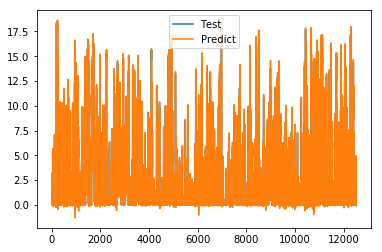

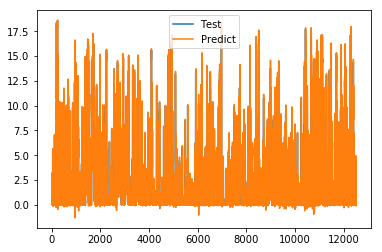

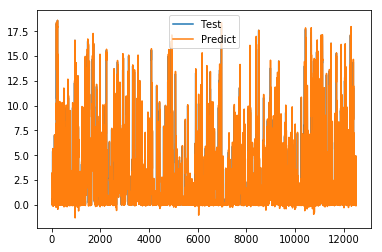

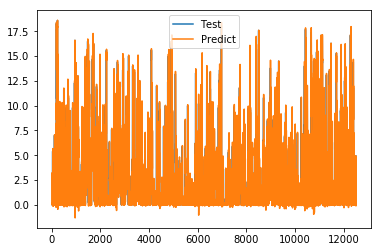

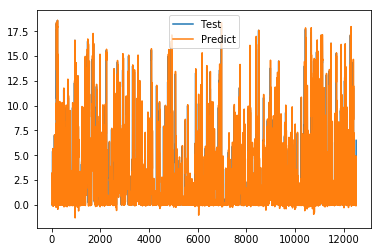

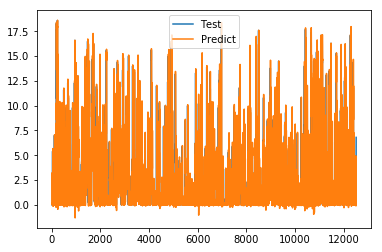

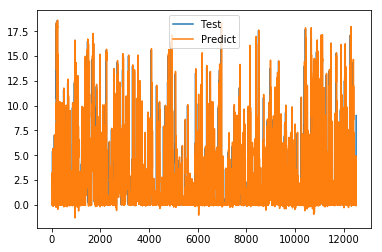

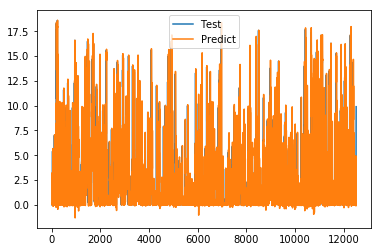

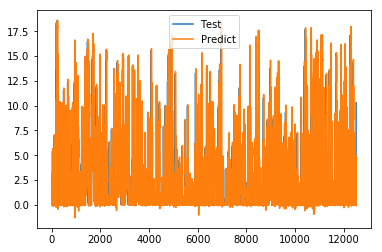

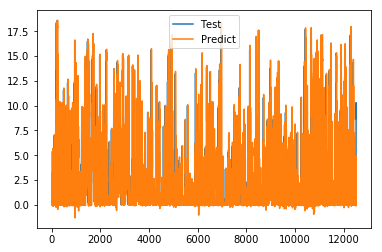

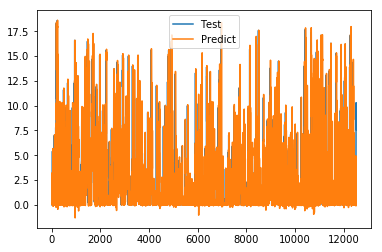

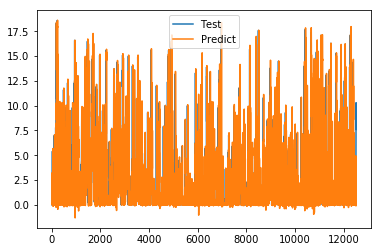

In [16]:
for key in y_test.keys():
    plt.plot(y_test[key], label="Test")
    plt.plot(y_pred[key],label="Predict")
    plt.legend()
    plt.show()

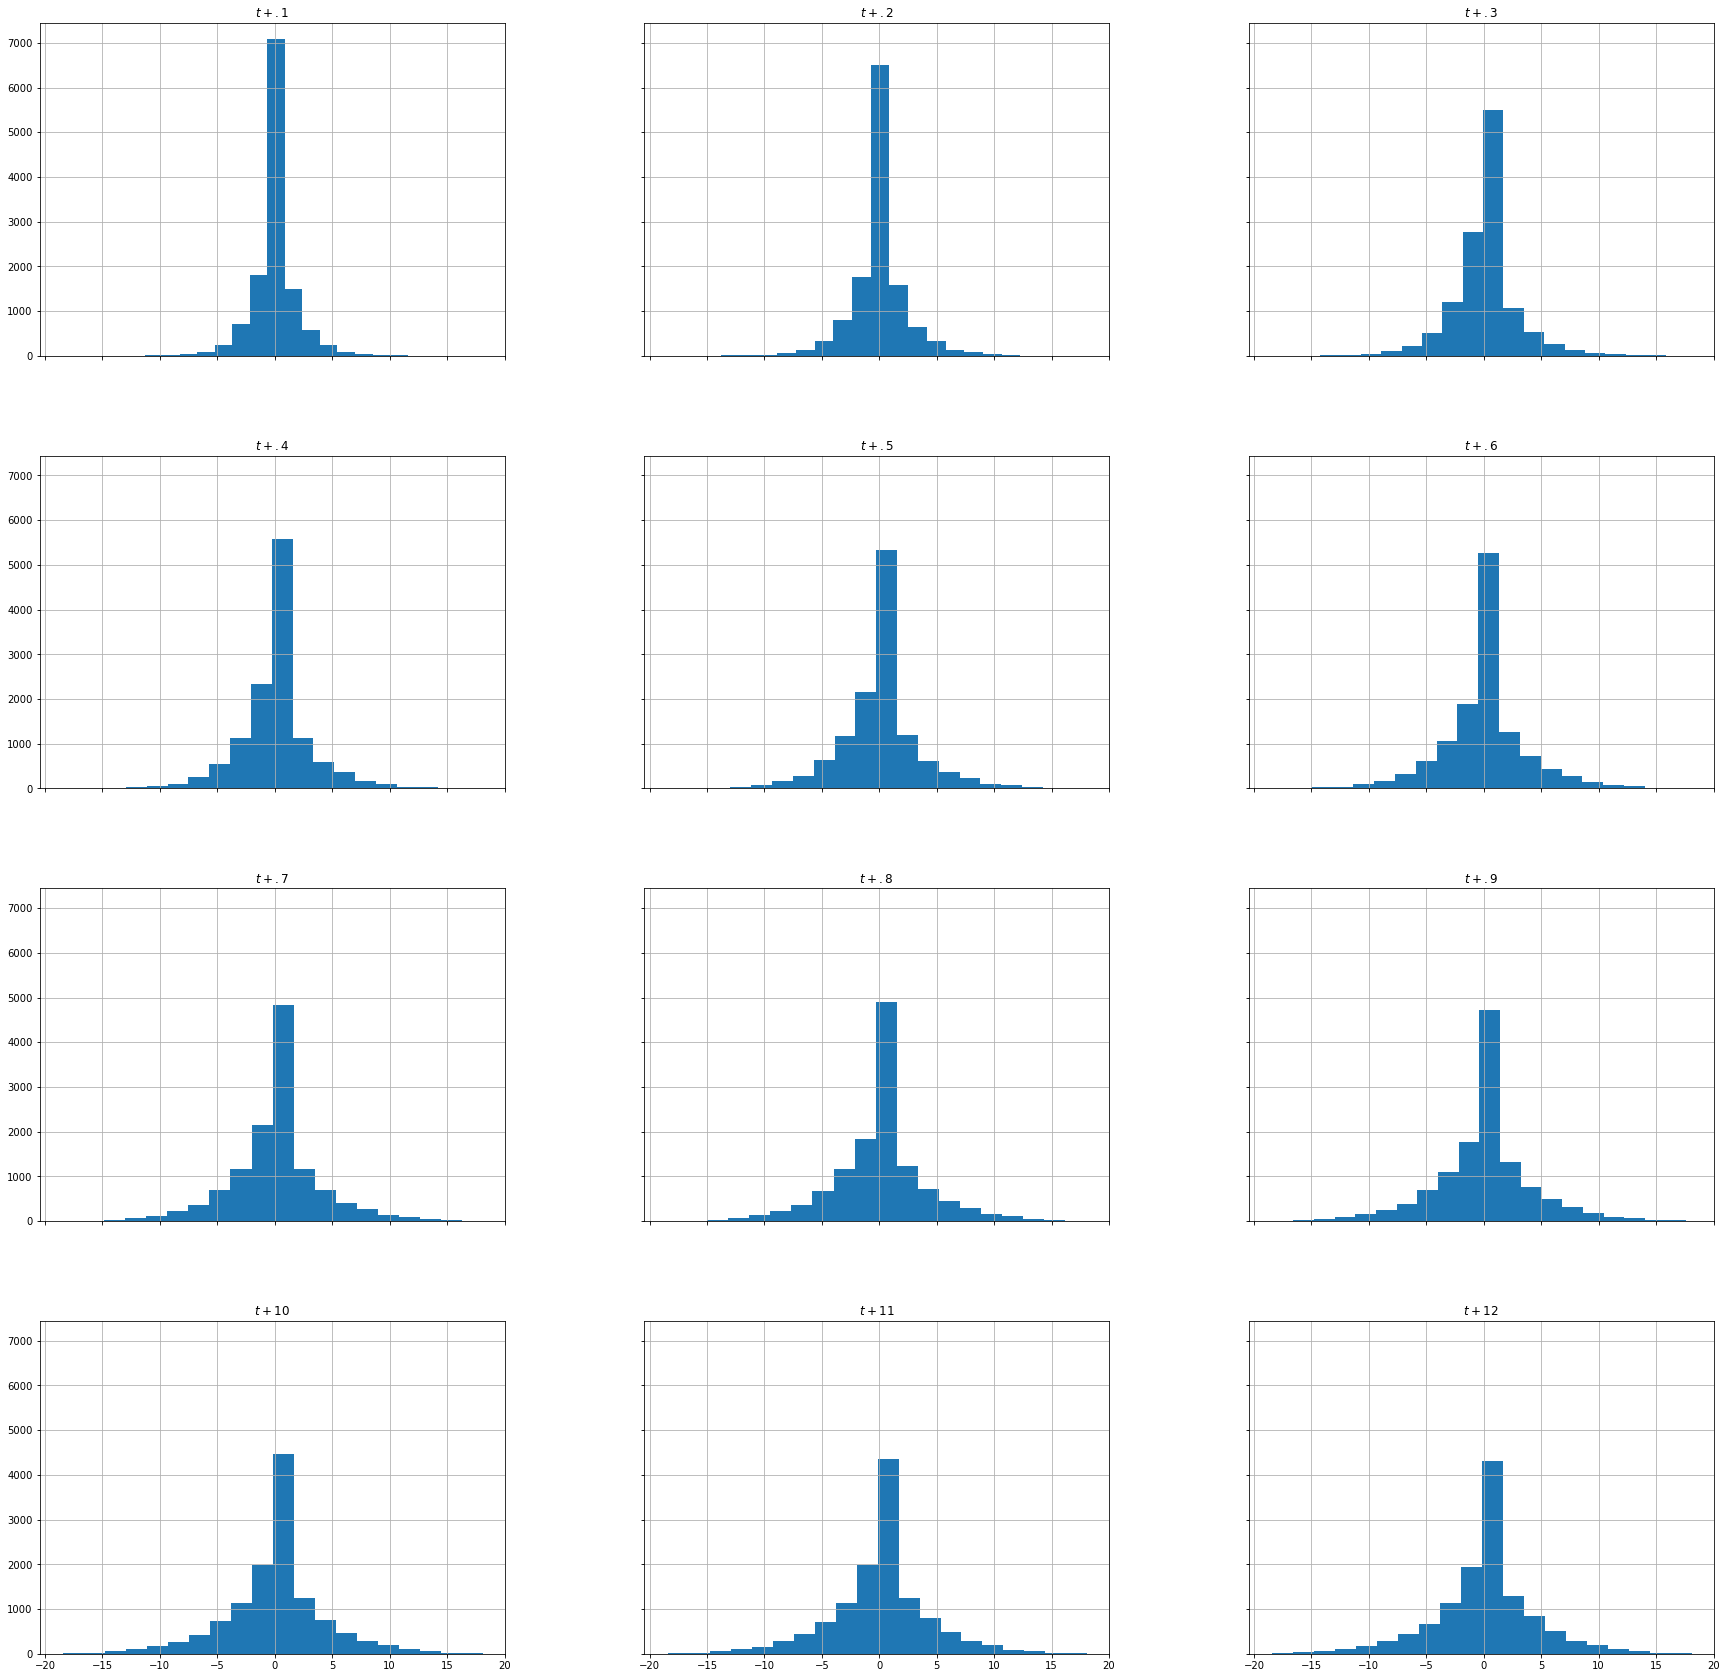

In [17]:
error.columns = pd.CategoricalIndex(column_names, order=True)
error.hist(sharex=True,sharey=True,bins=20, figsize=(30,30))
plt.show()

In [18]:
metrics = show_errors(y_test,y_pred)
metrics

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,1.158716,1.475529,1.730415,1.960648,2.162937,2.348644,2.507962,2.637591,2.747488,2.830040,2.892598,2.935075,2.282304
MSE,4.001310,6.131385,8.111235,10.055334,11.858632,13.588407,15.113355,16.480435,17.580603,18.465106,19.075876,19.498980,13.330055
MeAE,0.535997,0.722543,0.899997,1.015933,1.181296,1.300169,1.431281,1.528394,1.653989,1.700000,1.756674,1.820402,1.295556
MAPE,0.443568,0.564807,0.662309,0.750330,0.827583,0.898452,0.959134,1.008404,1.050089,1.081353,1.105000,1.120953,0.872665
$r^2$,0.678758,0.507739,0.348778,0.192699,0.047974,-0.090820,-0.212972,-0.322300,-0.410099,-0.480757,-0.529560,-0.563264,-0.069485


# LSTM

In [58]:
y_pred = pd.read_csv("../../results/lstm/y_approx.csv",names=column_names)
y_test  = pd.read_csv("../../results/lstm/y_test.csv",names=column_names)
error = y_test - y_pred

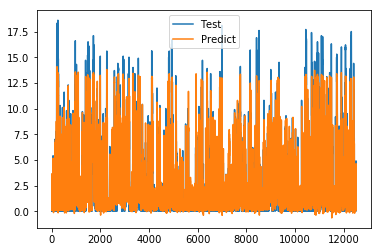

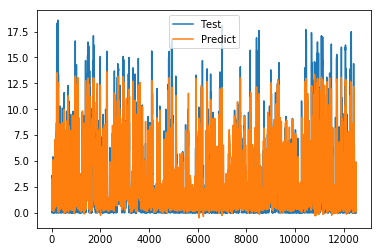

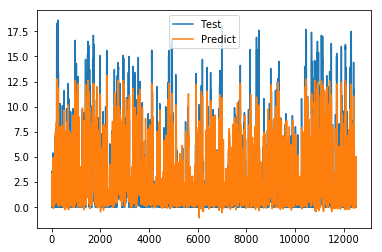

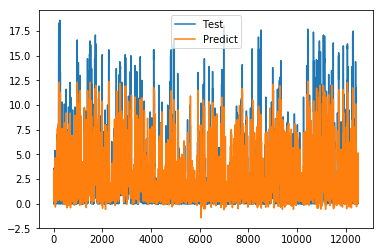

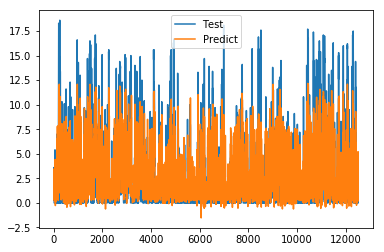

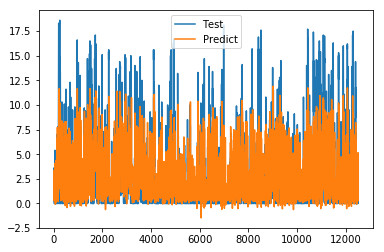

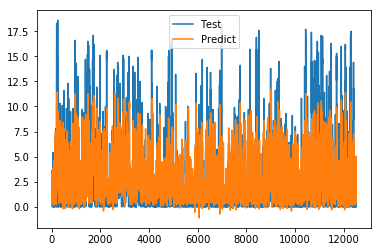

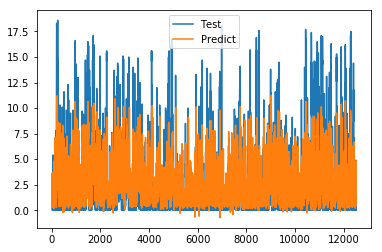

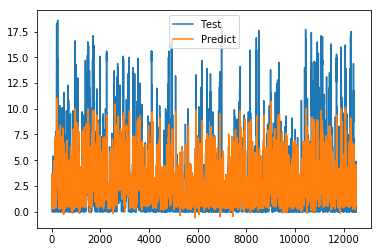

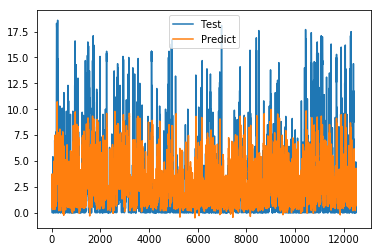

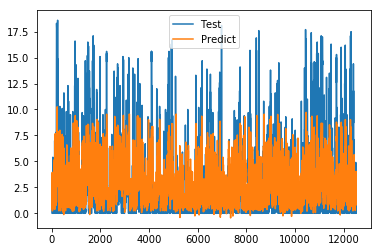

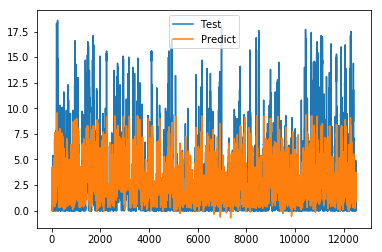

In [59]:
for key in y_test.keys():
    plt.plot(y_test[key], label="Test")
    plt.plot(y_pred[key],label="Predict")
    plt.legend()
    plt.show()

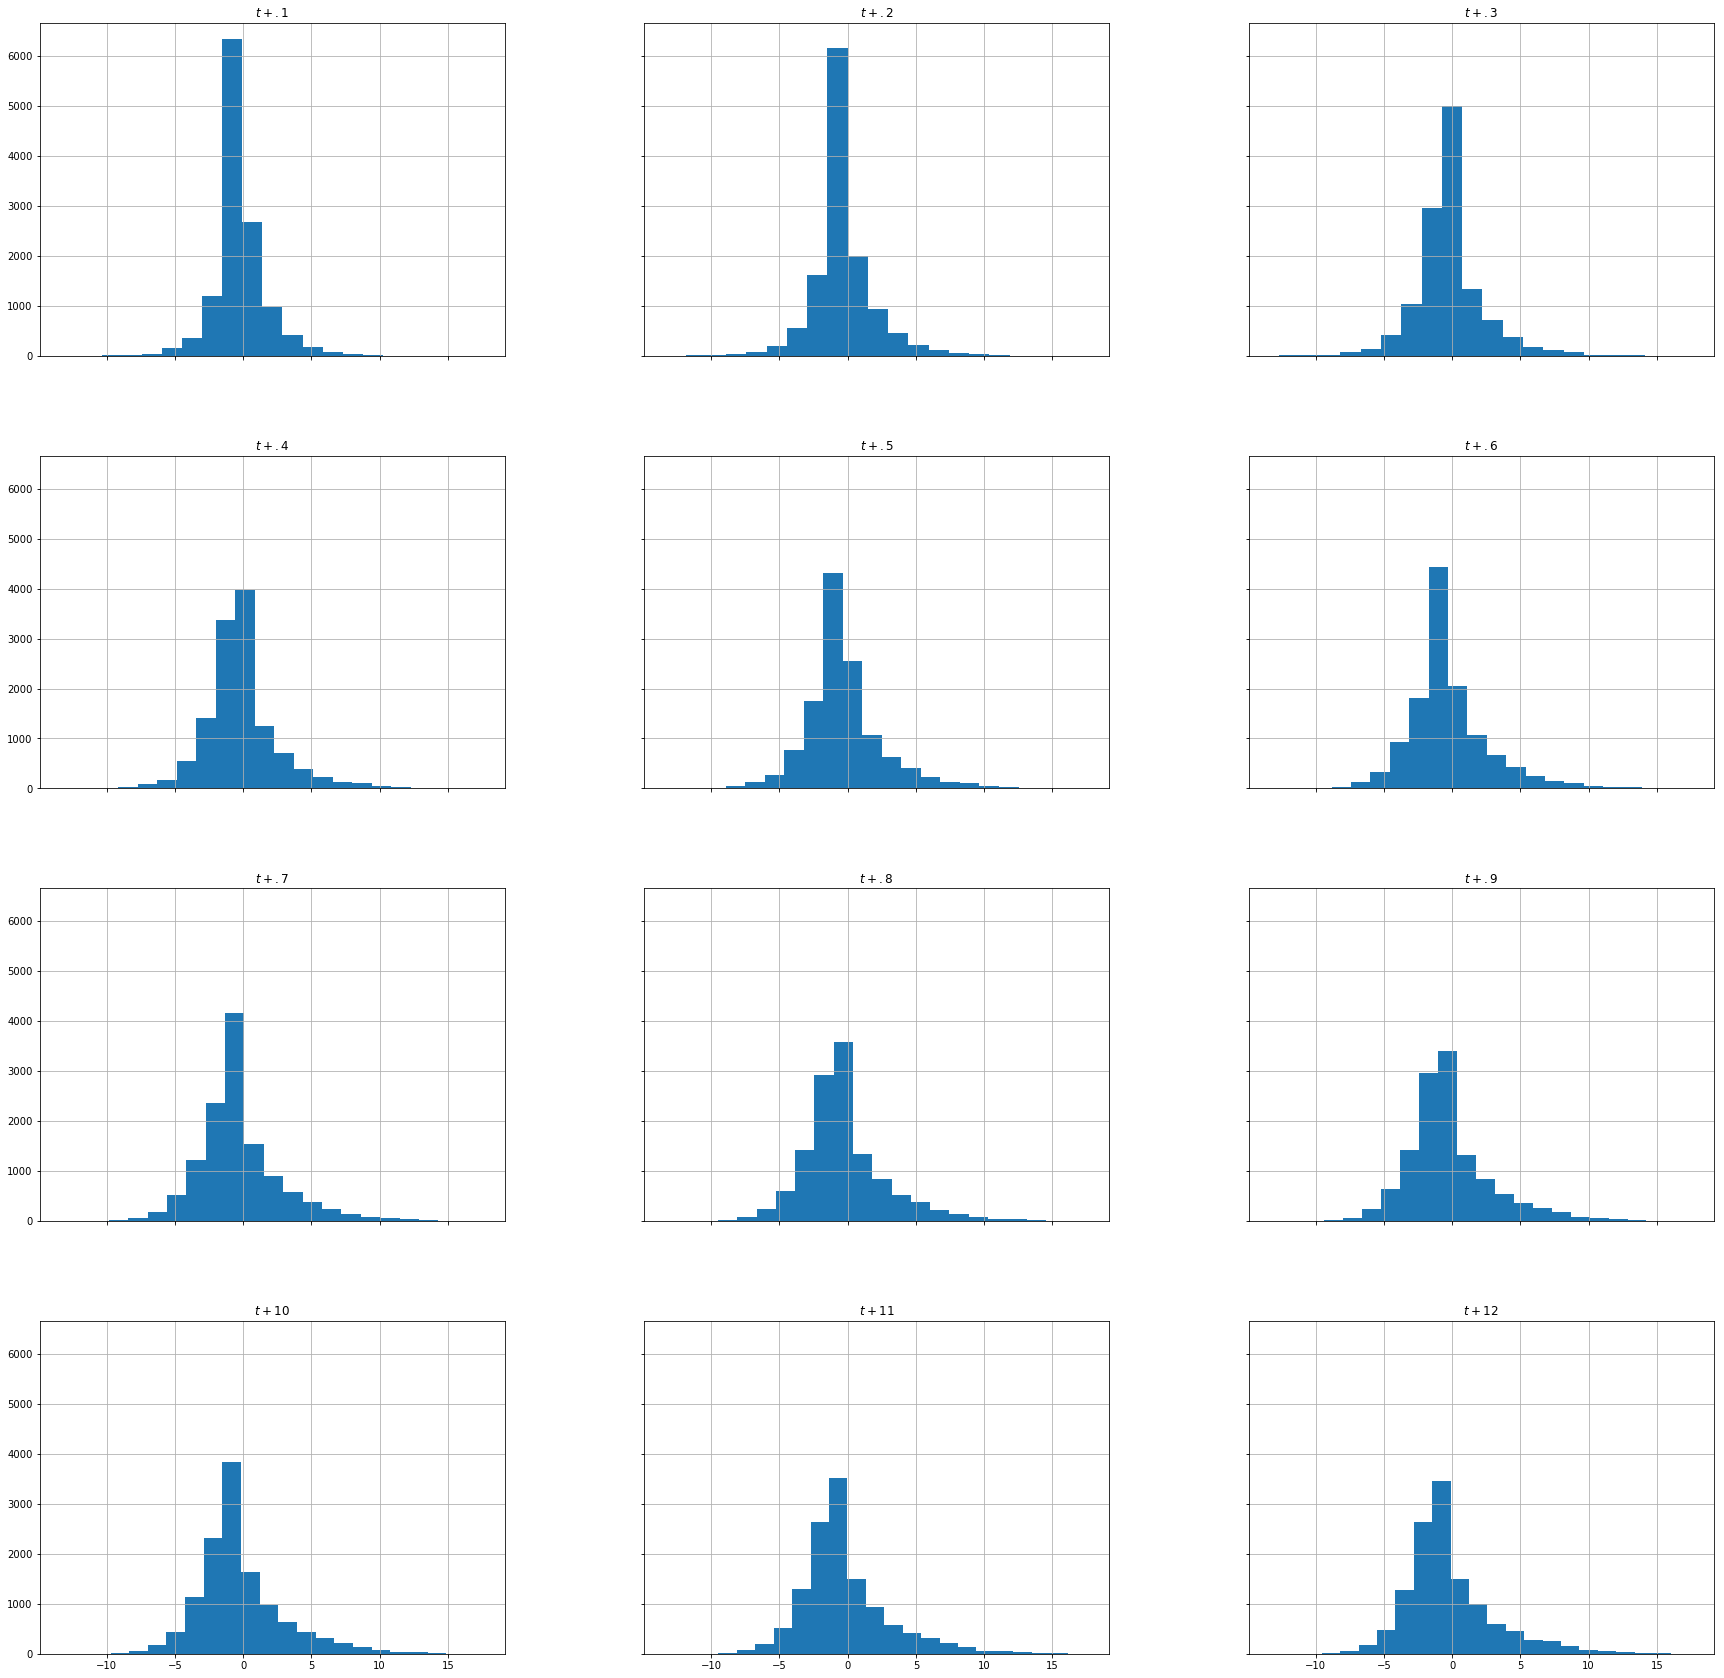

In [60]:
error.columns = pd.CategoricalIndex(column_names, order=True)
error.hist(sharex=True,sharey=True,bins=20, figsize=(30,30))
plt.show()

In [61]:
metrics = show_errors(y_test,y_pred)
metrics

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,1.247880,1.531209,1.693557,1.850414,2.003092,2.113058,2.205378,2.252625,2.303879,2.335548,2.386468,2.422842,2.028829
MSE,3.739158,5.164553,6.244459,7.187730,7.999749,8.677432,9.228787,9.655013,9.979707,10.209513,10.426785,10.598564,8.259287
MeAE,0.686646,0.906508,1.045310,1.215180,1.353896,1.447995,1.532667,1.597677,1.653729,1.689073,1.758172,1.830624,1.393123
MAPE,0.477602,0.586051,0.648178,0.708195,0.766600,0.808675,0.844014,0.862152,0.881860,0.894014,0.913587,0.927514,0.776537
$r^2$,0.699713,0.585249,0.498518,0.422757,0.357524,0.303090,0.258817,0.224618,0.198574,0.180136,0.162703,0.148910,0.336717


# ESN